In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


In [180]:
def wrangle(file):
    df = pd.read_csv(file)

    df = df[df['place_with_parent_names'].str.contains('Capital Federal')]
    df = df[df['property_type'] == 'apartment']
    df = df[df['price_aprox_usd']< 400_000]

    low, high = df['surface_covered_in_m2'].quantile([0.1 , 0.9])
    df = df[df['surface_covered_in_m2'].between(low, high)]

    


    return df




In [181]:
df = wrangle(r"C:\Users\HP\Desktop\buenos-aires-real-estate-1.csv").reset_index()
df

,index,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.60,129000.00,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
1,9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.80,87000.00,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
2,29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.20,118000.00,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
3,40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.80,57000.00,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
4,41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.00,90000.00,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,8589,sell,apartment,|Argentina|Capital Federal|Barracas|,"-34.631591,-58.370191",1118100.0,ARS,1114996.65,73536.95,49.0,42.0,1500.754082,26621.428570,3.0,1.0,NaN,http://barracas.properati.com.ar/npf1_venta_de...
1339,8590,sell,apartment,|Argentina|Capital Federal|Almagro|,"-34.6045547,-58.4182063",119000.0,USD,1804325.60,119000.00,46.0,41.0,2586.956522,2902.439024,NaN,NaN,NaN,http://almagro.properati.com.ar/ea4d_venta_dep...
1340,8593,sell,apartment,|Argentina|Capital Federal|Barracas|,"-34.6240024,-58.3905883",62000.0,USD,940068.80,62000.00,NaN,43.0,NaN,1441.860465,NaN,2.0,NaN,http://barracas.properati.com.ar/oc61_venta_de...
1341,8601,sell,apartment,|Argentina|Capital Federal|San Nicolás|,"-34.601455,-58.378132",125000.0,USD,1895300.00,125000.00,NaN,70.0,NaN,1785.714286,2.0,3.0,NaN,http://san-nicolas.properati.com.ar/1004t_vent...


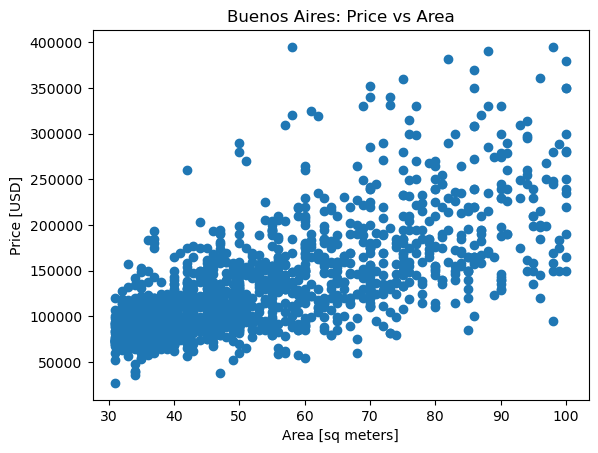

In [182]:
plt.scatter(x= df["surface_covered_in_m2"], y = df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title('Buenos Aires: Price vs Area')

plt.show()

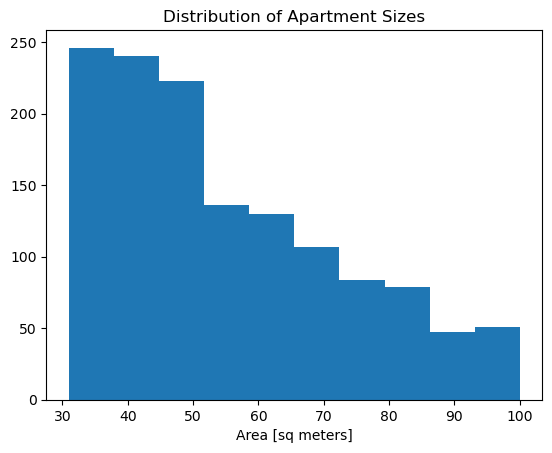

In [183]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");
plt.show()

In [186]:
#Slitting
features = ["surface_covered_in_m2"]
X = df[features]
y = df["price_aprox_usd"]

In [187]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [188]:
#Baseline Model
y_pred_baseline = [y_train.mean()] * len(y_train)
y_pred_baseline_MAE = mean_absolute_error( y_train, y_pred_baseline)

In [189]:
print(y_pred_baseline[:3])
y_pred_baseline_MAE

[135862.29943202977, 135862.29943202977, 135862.29943202977]


46458.23326565962

In [190]:
model = LinearRegression()

In [191]:
model.fit(X_train, y_train)

LinearRegression()

In [192]:
#Predict Y train
y_pred_training = model.predict(X_train)

In [193]:
#y train MAE
y_pred_training_MAE = mean_absolute_error(y_train, y_pred_training)
print(y_pred_training_MAE)

31710.760370592194


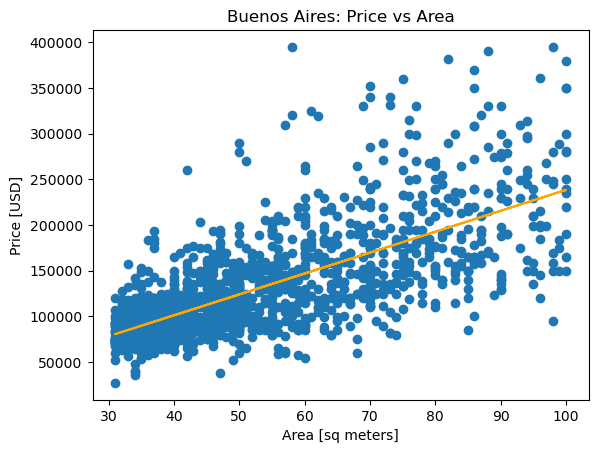

In [194]:
plt.plot(X_train.values,y_pred_training , color = 'orange')
plt.scatter(x= df["surface_covered_in_m2"], y = df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title('Buenos Aires: Price vs Area')

plt.show()

In [199]:
#X_test

y_test_prediction = model.predict(X_test)
prediction[:3]
MAE = mean_absolute_error(y_test, y_test_prediction )
print(MAE)

29483.299285821387


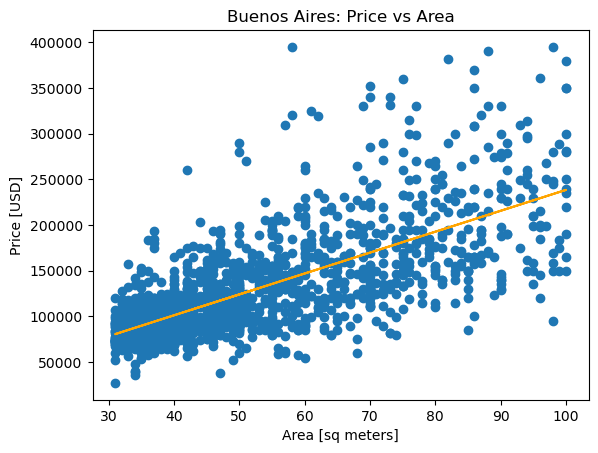

In [203]:
plt.plot(X_test.values,y_test_prediction , color = 'orange')
plt.scatter(x= df["surface_covered_in_m2"], y = df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title('Buenos Aires: Price vs Area')

plt.show()

In [216]:
#COmmunicate Result
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)

print(f"intercept = {intercept} and coefficient = {coefficient}")

intercept = 9720.25 and coefficient = [2288.03]


In [ ]:
apartment price = intercept + coefficient * surface_covered_in_m2